In [40]:
!pip install nltk stopwords

In [41]:
pip install googletrans==3.1.0a0

Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
import seaborn as sns
import re
import string
import warnings
from googletrans import Translator
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objs as go

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud

import torch
from transformers import AutoTokenizer, LlamaForCausalLM, pipeline, AutoModelForCausalLM

warnings.filterwarnings("ignore")


In [43]:
data=pd.read_csv('/kaggle/input/jokowisentiment/jokowi 2019-2024.csv')

In [44]:
data

,Judul Berita,Nama Media,Waktu Terbit,Link Berita
0,Presiden Jokowi Paparkan Lima Fokus Kerja di P...,mmckalteng,20 Oct 2019,https://mmc.kalteng.go.id/berita/read/8706/pre...
1,"Pidato Awal Periode Kedua, Presiden Jokowi: Ke...",Kementerian Sekretariat Negara,20 Oct 2019,https://www.setneg.go.id/baca/index/pidato_awa...
2,"Pelantikannya Sederhana, Presiden Jokowi dan W...",Sekretariat Kabinet Republik Indonesia,20 Oct 2019,https://setkab.go.id/pelantikannya-sederhana-p...
3,Ini Bunyi Sumpah Pelantikan Presiden Jokowi da...,Kompas.com,20 Oct 2019,https://nasional.kompas.com/read/2019/10/20/16...
4,"Jokowi: Resmi dilantik, target pendapatan warg...",BBC,20 Oct 2019,https://www.bbc.com/indonesia/indonesia-50114937
...,...,...,...,...
68677,Lontong Kikil Jadi Menu Spesial Acara Pisah Sa...,KOMPAS.tv,2024-10-19,https://www.kompas.tv/nasional/547146/lontong-...
68678,Projo Ingin Lakukan Transformasi Organisasi Se...,Suara.com,2024-10-19,https://www.suara.com/news/2024/10/19/235402/p...
68679,Momen Iriana Jokowi Bersalaman dengan Puan Mah...,Kumparan,2024-10-19,https://kumparan.com/kumparannews/momen-iriana...
68680,"Spanduk ""Terima Kasih Jokowi"" dan ""Selamat Bek...",Kompas.com,2024-10-19,https://regional.kompas.com/read/2024/10/20/09...


In [45]:
data['Waktu Terbit'] = data['Waktu Terbit'].apply(
    lambda x: pd.to_datetime(x.replace('Sept', 'Sep'), format='mixed') if isinstance(x, str) else x
)

data

,Judul Berita,Nama Media,Waktu Terbit,Link Berita
0,Presiden Jokowi Paparkan Lima Fokus Kerja di P...,mmckalteng,2019-10-20,https://mmc.kalteng.go.id/berita/read/8706/pre...
1,"Pidato Awal Periode Kedua, Presiden Jokowi: Ke...",Kementerian Sekretariat Negara,2019-10-20,https://www.setneg.go.id/baca/index/pidato_awa...
2,"Pelantikannya Sederhana, Presiden Jokowi dan W...",Sekretariat Kabinet Republik Indonesia,2019-10-20,https://setkab.go.id/pelantikannya-sederhana-p...
3,Ini Bunyi Sumpah Pelantikan Presiden Jokowi da...,Kompas.com,2019-10-20,https://nasional.kompas.com/read/2019/10/20/16...
4,"Jokowi: Resmi dilantik, target pendapatan warg...",BBC,2019-10-20,https://www.bbc.com/indonesia/indonesia-50114937
...,...,...,...,...
68677,Lontong Kikil Jadi Menu Spesial Acara Pisah Sa...,KOMPAS.tv,2024-10-19,https://www.kompas.tv/nasional/547146/lontong-...
68678,Projo Ingin Lakukan Transformasi Organisasi Se...,Suara.com,2024-10-19,https://www.suara.com/news/2024/10/19/235402/p...
68679,Momen Iriana Jokowi Bersalaman dengan Puan Mah...,Kumparan,2024-10-19,https://kumparan.com/kumparannews/momen-iriana...
68680,"Spanduk ""Terima Kasih Jokowi"" dan ""Selamat Bek...",Kompas.com,2024-10-19,https://regional.kompas.com/read/2024/10/20/09...


In [46]:
data.isnull().sum()

Judul Berita    0
Nama Media      0
Waktu Terbit    0
Link Berita     0
dtype: int64

In [47]:
data.duplicated().any()

True

In [48]:
data.duplicated().sum()

503

In [49]:
data.drop_duplicates(inplace=True)

In [50]:
data

,Judul Berita,Nama Media,Waktu Terbit,Link Berita
0,Presiden Jokowi Paparkan Lima Fokus Kerja di P...,mmckalteng,2019-10-20,https://mmc.kalteng.go.id/berita/read/8706/pre...
1,"Pidato Awal Periode Kedua, Presiden Jokowi: Ke...",Kementerian Sekretariat Negara,2019-10-20,https://www.setneg.go.id/baca/index/pidato_awa...
2,"Pelantikannya Sederhana, Presiden Jokowi dan W...",Sekretariat Kabinet Republik Indonesia,2019-10-20,https://setkab.go.id/pelantikannya-sederhana-p...
3,Ini Bunyi Sumpah Pelantikan Presiden Jokowi da...,Kompas.com,2019-10-20,https://nasional.kompas.com/read/2019/10/20/16...
4,"Jokowi: Resmi dilantik, target pendapatan warg...",BBC,2019-10-20,https://www.bbc.com/indonesia/indonesia-50114937
...,...,...,...,...
68677,Lontong Kikil Jadi Menu Spesial Acara Pisah Sa...,KOMPAS.tv,2024-10-19,https://www.kompas.tv/nasional/547146/lontong-...
68678,Projo Ingin Lakukan Transformasi Organisasi Se...,Suara.com,2024-10-19,https://www.suara.com/news/2024/10/19/235402/p...
68679,Momen Iriana Jokowi Bersalaman dengan Puan Mah...,Kumparan,2024-10-19,https://kumparan.com/kumparannews/momen-iriana...
68680,"Spanduk ""Terima Kasih Jokowi"" dan ""Selamat Bek...",Kompas.com,2024-10-19,https://regional.kompas.com/read/2024/10/20/09...


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68179 entries, 0 to 68681
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Judul Berita  68179 non-null  object        
 1   Nama Media    68179 non-null  object        
 2   Waktu Terbit  68179 non-null  datetime64[ns]
 3   Link Berita   68179 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.6+ MB


In [52]:
# Menghitung jumlah media unik
unique_media_count = data['Nama Media'].nunique()

# Menampilkan jumlah media unik
print(f'Jumlah media yang memberitakan fed rate: {unique_media_count}')


Jumlah media yang memberitakan fed rate: 1858


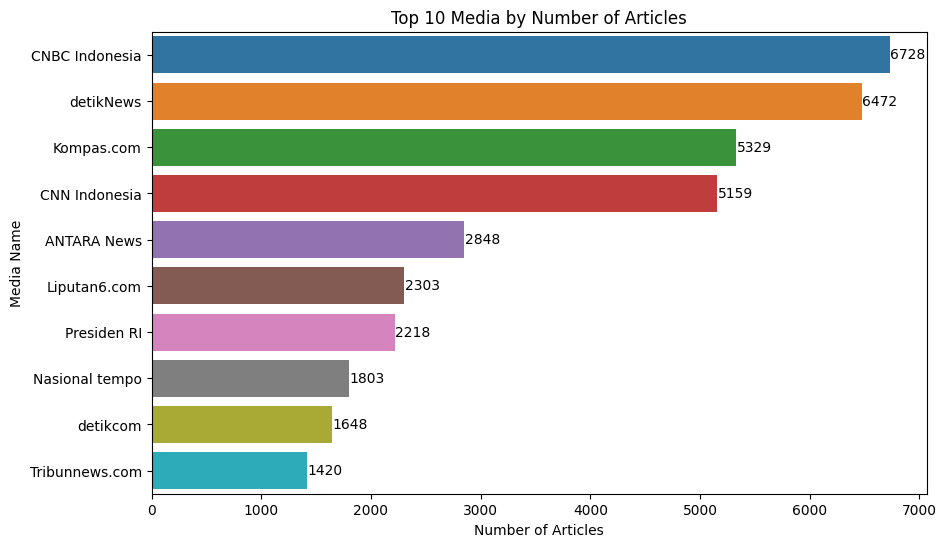

In [53]:
# Menghitung Top 10 media
media_counts = data['Nama Media'].value_counts().head(10)

# Membuat plot
plt.figure(figsize=(10,6))
sns.barplot(x=media_counts, y=media_counts.index)

# Menambahkan judul dan label sumbu
plt.title('Top 10 Media by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Media Name')

# Menambahkan label jumlah artikel di samping bar
for i, count in enumerate(media_counts):
    plt.text(count + 5, i, str(count), va='center')

# Menampilkan plot
plt.show()


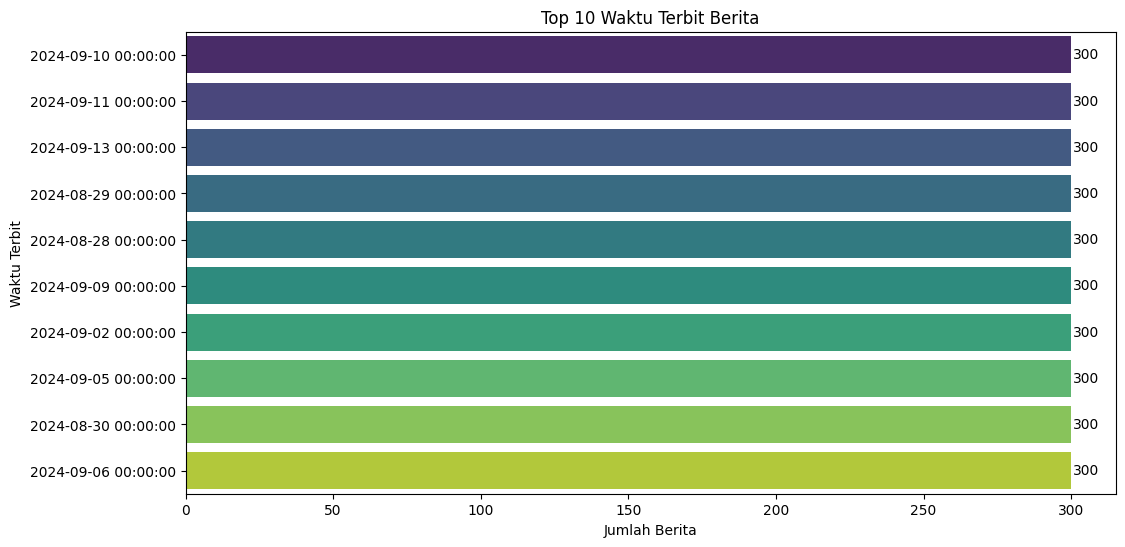

In [54]:
# Menghitung frekuensi waktu terbit
time_counts = data['Waktu Terbit'].value_counts().head(10)  # Mengambil 10 waktu terbit teratas

# Membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(x=time_counts.values, y=time_counts.index, palette="viridis")

# Menambahkan judul dan label sumbu
plt.title('Top 10 Waktu Terbit Berita')
plt.xlabel('Jumlah Berita')
plt.ylabel('Waktu Terbit')

# Menambahkan label jumlah berita di dekat bar
for i, count in enumerate(time_counts):
    plt.text(count + 0.5, i, str(count), va='center')

# Menampilkan plot
plt.show()

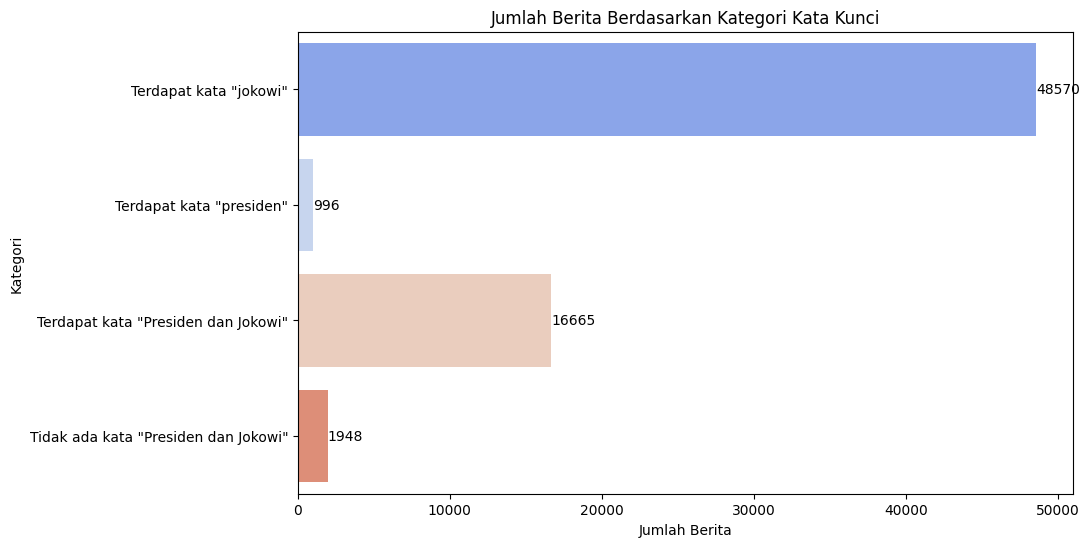

In [55]:
# Menghitung jumlah berita untuk setiap kategori
count_jokowi = data['Judul Berita'].str.contains('jokowi', case=False, na=False).sum()  # Mengandung 'fed'
count_presiden = data['Judul Berita'].str.contains('presiden', case=False, na=False).sum()  # Mengandung 'rate'
count_presiden_jokowi = data[data['Judul Berita'].str.contains('jokowi', case=False, na=False) & 
                      data['Judul Berita'].str.contains('presiden', case=False, na=False)].shape[0]  # Mengandung keduanya
count_neither = data[~data['Judul Berita'].str.contains('jokowi', case=False, na=False) & 
                     ~data['Judul Berita'].str.contains('presiden', case=False, na=False)].shape[0]  # Tidak mengandung keduanya

# Menyusun data untuk visualisasi
categories = ['Terdapat kata "jokowi"', 'Terdapat kata "presiden"', 'Terdapat kata "Presiden dan Jokowi"', 'Tidak ada kata "Presiden dan Jokowi"']
counts = [count_jokowi - count_presiden_jokowi, count_presiden - count_presiden_jokowi, count_presiden_jokowi, count_neither]

# Membuat plot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(y=categories, x=counts, palette='coolwarm')  # Tukar x dan y untuk horizontal

# Menambahkan judul dan label sumbu
plt.title('Jumlah Berita Berdasarkan Kategori Kata Kunci')
plt.xlabel('Jumlah Berita')
plt.ylabel('Kategori')

# Menambahkan label jumlah berita di samping bar
for i, count in enumerate(counts):
    plt.text(count + 5, i, str(count), va='center')  # Posisi label di samping bar

# Menampilkan plot
plt.show()


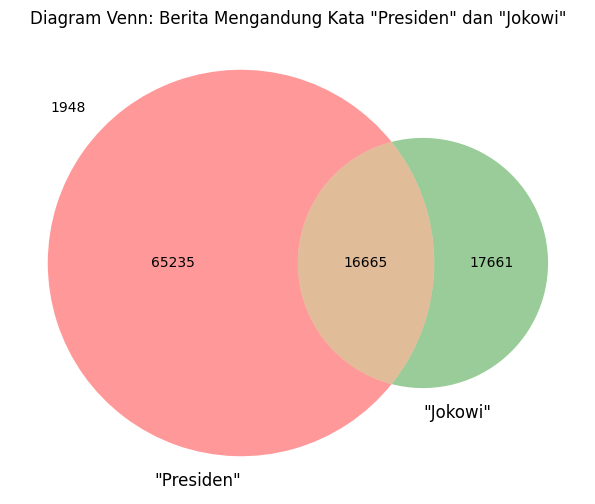

In [56]:
# Membuat diagram Venn
plt.figure(figsize=(10, 6))

# Menggunakan venn2 untuk dua kategori
venn = venn2(subsets=(count_jokowi, count_presiden, count_presiden_jokowi), 
              set_labels=('"Presiden"', '"Jokowi"'))

# Menambahkan informasi untuk kategori "Tidak ada kata Fed dan Rate"
plt.text(-0.6, 0.4, count_neither, fontsize=10, ha='center')

# Menambahkan judul
plt.title('Diagram Venn: Berita Mengandung Kata "Presiden" dan "Jokowi"')
plt.show()

In [57]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[«»]', '', text)  # menargetkan tanda khusus seperti « dan »
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [58]:
# Ensure that the "Text" column is a string
data['Judul Berita'] = data['Judul Berita'].astype(str)

In [59]:
data['Clean Text']=data['Judul Berita'].apply(lambda x:clean_text(x))
data

,Judul Berita,Nama Media,Waktu Terbit,Link Berita,Clean Text
0,Presiden Jokowi Paparkan Lima Fokus Kerja di P...,mmckalteng,2019-10-20,https://mmc.kalteng.go.id/berita/read/8706/pre...,presiden jokowi paparkan lima fokus kerja di p...
1,"Pidato Awal Periode Kedua, Presiden Jokowi: Ke...",Kementerian Sekretariat Negara,2019-10-20,https://www.setneg.go.id/baca/index/pidato_awa...,pidato awal periode kedua presiden jokowi kerj...
2,"Pelantikannya Sederhana, Presiden Jokowi dan W...",Sekretariat Kabinet Republik Indonesia,2019-10-20,https://setkab.go.id/pelantikannya-sederhana-p...,pelantikannya sederhana presiden jokowi dan wa...
3,Ini Bunyi Sumpah Pelantikan Presiden Jokowi da...,Kompas.com,2019-10-20,https://nasional.kompas.com/read/2019/10/20/16...,ini bunyi sumpah pelantikan presiden jokowi da...
4,"Jokowi: Resmi dilantik, target pendapatan warg...",BBC,2019-10-20,https://www.bbc.com/indonesia/indonesia-50114937,jokowi resmi dilantik target pendapatan warga ...
...,...,...,...,...,...
68677,Lontong Kikil Jadi Menu Spesial Acara Pisah Sa...,KOMPAS.tv,2024-10-19,https://www.kompas.tv/nasional/547146/lontong-...,lontong kikil jadi menu spesial acara pisah sa...
68678,Projo Ingin Lakukan Transformasi Organisasi Se...,Suara.com,2024-10-19,https://www.suara.com/news/2024/10/19/235402/p...,projo ingin lakukan transformasi organisasi se...
68679,Momen Iriana Jokowi Bersalaman dengan Puan Mah...,Kumparan,2024-10-19,https://kumparan.com/kumparannews/momen-iriana...,momen iriana jokowi bersalaman dengan puan mah...
68680,"Spanduk ""Terima Kasih Jokowi"" dan ""Selamat Bek...",Kompas.com,2024-10-19,https://regional.kompas.com/read/2024/10/20/09...,spanduk terima kasih jokowi dan selamat bekerj...


In [61]:
# Membuat objek Translator

translator = Translator()



# Fungsi untuk mendeteksi bahasa

def detect_language(text):

    detection = translator.detect(text)

    return detection.lang, detection.confidence



# Menambahkan kolom 'language' dan 'confidence' berdasarkan deteksi bahasa dari kolom 'Judul Berita'

data[['Detected Language', 'confidence']] = data['Judul Berita'].apply(lambda x: pd.Series(detect_language(x)))

In [62]:
data['Detected Language'].value_counts()

Detected Language
id     66990
en       830
ms       190
mad       53
bbc       51
min       37
jw        10
ace        2
iba        2
trp        2
pl         2
jam        2
btx        1
crs        1
ff         1
su         1
fr         1
no         1
ban        1
es         1
Name: count, dtype: int64

In [68]:
# Menetapkan kondisi berdasarkan 'Detected Language' dan beberapa nilai di 'Nama Media'
condition = (data['Detected Language'] == 'mad') & (data['Nama Media'].isin(["Sekretariat Kabinet Republik Indonesia", "VOI.ID", "Tempo.co English", "The Jakarta Post"]))

# Mengganti nilai 'mad' menjadi 'Madurese' hanya pada baris yang memenuhi kondisi
data.loc[condition, 'Detected Language'] = 'en'


In [69]:
# Definisikan nilai-nilai yang akan diubah
replace_values = ['ace', 'iba', 'trp', 'pl', 'jam', 'btx', 'crs', 'ff', 'su', 'fr', 'no', 'ban', 'es', 'bbc', 'min', 'jw', 'ms', 'mad']

# Mengganti nilai pada kolom Detected Language
data['Detected Language'] = data['Detected Language'].replace(replace_values, 'id')


In [70]:
data['Detected Language'].value_counts()

Detected Language
id    67341
en      838
Name: count, dtype: int64

In [76]:
# Mendapatkan daftar stopwords untuk berbagai bahasa
stop_words = {
    'en': set(stopwords.words('english')),
    'id': stopwords.words('indonesian')
    # Tambahkan bahasa lain sesuai kebutuhan
}

# Fungsi untuk menghilangkan stopwords berdasarkan bahasa
def remove_stopwords(row):
    lang = row['Detected Language']
    text = row['Clean Text']
    
    if lang in stop_words:
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stop_words[lang]]
        return ' '.join(filtered_words)
    return text  # Jika bahasa tidak ada di daftar stopwords

# Menerapkan stopword removal pada kolom Clean Text
data['stopword'] = data.apply(remove_stopwords, axis=1)

In [77]:
data

,Judul Berita,Nama Media,Waktu Terbit,Link Berita,Clean Text,Detected Language,confidence,text_word_count,word_count,stopword
0,Presiden Jokowi Paparkan Lima Fokus Kerja di P...,mmckalteng,2019-10-20,https://mmc.kalteng.go.id/berita/read/8706/pre...,presiden jokowi paparkan lima fokus kerja di p...,id,1.000000,10,10,presiden jokowi paparkan fokus kerja periode p...
1,"Pidato Awal Periode Kedua, Presiden Jokowi: Ke...",Kementerian Sekretariat Negara,2019-10-20,https://www.setneg.go.id/baca/index/pidato_awa...,pidato awal periode kedua presiden jokowi kerj...,id,0.989531,11,11,pidato periode presiden jokowi kerja keras dob...
2,"Pelantikannya Sederhana, Presiden Jokowi dan W...",Sekretariat Kabinet Republik Indonesia,2019-10-20,https://setkab.go.id/pelantikannya-sederhana-p...,pelantikannya sederhana presiden jokowi dan wa...,id,1.000000,12,12,pelantikannya sederhana presiden jokowi wapres...
3,Ini Bunyi Sumpah Pelantikan Presiden Jokowi da...,Kompas.com,2019-10-20,https://nasional.kompas.com/read/2019/10/20/16...,ini bunyi sumpah pelantikan presiden jokowi da...,id,1.000000,11,11,bunyi sumpah pelantikan presiden jokowi wakil ...
4,"Jokowi: Resmi dilantik, target pendapatan warg...",BBC,2019-10-20,https://www.bbc.com/indonesia/indonesia-50114937,jokowi resmi dilantik target pendapatan warga ...,id,1.000000,13,13,jokowi resmi dilantik target pendapatan warga ...
...,...,...,...,...,...,...,...,...,...,...
68677,Lontong Kikil Jadi Menu Spesial Acara Pisah Sa...,KOMPAS.tv,2024-10-19,https://www.kompas.tv/nasional/547146/lontong-...,lontong kikil jadi menu spesial acara pisah sa...,id,1.000000,12,12,lontong kikil menu spesial acara pisah sambut ...
68678,Projo Ingin Lakukan Transformasi Organisasi Se...,Suara.com,2024-10-19,https://www.suara.com/news/2024/10/19/235402/p...,projo ingin lakukan transformasi organisasi se...,id,1.000000,11,11,projo lakukan transformasi organisasi jokowi l...
68679,Momen Iriana Jokowi Bersalaman dengan Puan Mah...,Kumparan,2024-10-19,https://kumparan.com/kumparannews/momen-iriana...,momen iriana jokowi bersalaman dengan puan mah...,id,1.000000,8,8,momen iriana jokowi bersalaman puan maharani k...
68680,"Spanduk ""Terima Kasih Jokowi"" dan ""Selamat Bek...",Kompas.com,2024-10-19,https://regional.kompas.com/read/2024/10/20/09...,spanduk terima kasih jokowi dan selamat bekerj...,id,0.985336,13,13,spanduk terima kasih jokowi selamat prabowo hi...


In [78]:
data.to_csv('jokowi.csv', index=False)

In [2]:
# Langkah 1: Memuat model dan tokenizer
base_model = "/kaggle/input/gemma-2/transformers/gemma-2-9b-it/2"
device = "cuda" if torch.cuda.is_available() else "cpu"

# Memuat tokenizer
tokenizer = AutoTokenizer.from_pretrained(base_model)

# Memuat model dengan pemetaan perangkat otomatis untuk menghemat memori
model = AutoModelForCausalLM.from_pretrained(base_model, torch_dtype=torch.float16, device_map="auto")

# Membuat pipeline untuk *text generation*
pipe = pipeline('text-generation', model=model, tokenizer=tokenizer)

# Langkah 2: Mendefinisikan fungsi get_sentiment dengan prompt yang baru
def get_sentiment(sentence):
    # Prompt yang telah disempurnakan dengan format eksplisit
    message = [
        {
            "role": "user",
            "content": f"As a political expert fluent in both English and Indonesian, analyze the public perception reflected in the following text regarding Jokowi's presidency from 2019 to 2024. "
                       f"Respond in the exact format: 'The sentiment is: Positive', 'The sentiment is: Negative', or 'The sentiment is: Neutral'.\n"
                       f"Text: \"{sentence}\"\n"
                       f"The sentiment is:"
        }
    ]
    # Menghasilkan prompt dengan parameter yang disempurnakan
    prompt = pipe.tokenizer.apply_chat_template(message, tokenize=False, add_generation_prompt=True)
    outputs = pipe(
        prompt,
        do_sample=True,
        temperature=0.1,
        top_k=1,
        top_p=0.1,
        max_new_tokens=5,  # Menyediakan ruang yang cukup untuk respons singkat
        add_special_tokens=True
    )
    
    # Memproses respons yang dihasilkan untuk mendapatkan sentimen
    resp = outputs[0]["generated_text"][len(prompt):].strip()
    if "The sentiment is: Negative" in resp:
        return "negative" 
    elif "The sentiment is: Positive" in resp:
        return "positive"
    elif "The sentiment is: Neutral" in resp:
        return "neutral"
    else:
        return "neutral"  # Fallback default jika format tidak sesuai

# Langkah 5: Menerapkan analisis sentimen pada setiap judul berita dengan notifikasi progres
def get_sentiment_with_progress(data):
    for i, row in data.iterrows():
        # Mendapatkan sentimen untuk baris saat ini
        sentiment = get_sentiment(row['Judul Berita'])
        data.at[i, 'sentiment'] = sentiment
        
        # Menampilkan progres setiap 1000 baris
        if (i + 1) % 1000 == 0:
            print(f"{i + 1} baris telah diproses.")
    
    return data

# Menambahkan kolom baru untuk sentimen
data['sentiment'] = None

# Menerapkan fungsi dengan pelacakan progres
data = get_sentiment_with_progress(data)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

The 'max_batch_size' argument of HybridCache is deprecated and will be removed in v4.46. Use the more precisely named 'batch_size' argument instead.
Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


1000 rows have been processed.
2000 rows have been processed.
3000 rows have been processed.
4000 rows have been processed.
5000 rows have been processed.
6000 rows have been processed.
7000 rows have been processed.
8000 rows have been processed.
9000 rows have been processed.
10000 rows have been processed.
11000 rows have been processed.
12000 rows have been processed.
13000 rows have been processed.
14000 rows have been processed.
15000 rows have been processed.
16000 rows have been processed.
17000 rows have been processed.
18000 rows have been processed.
19000 rows have been processed.
20000 rows have been processed.
21000 rows have been processed.
22000 rows have been processed.
23000 rows have been processed.
24000 rows have been processed.
25000 rows have been processed.
26000 rows have been processed.
27000 rows have been processed.
28000 rows have been processed.
29000 rows have been processed.
30000 rows have been processed.
31000 rows have been processed.
32000 rows have b

In [3]:
data.to_csv('publik persepsi.csv', index=False)

In [4]:
data['sentiment'].value_counts()

sentiment
neutral     32248
positive    23711
negative    12220
Name: count, dtype: int64

In [6]:
data[data['sentiment'] == 'positive']

,Judul Berita,Nama Media,Waktu Terbit,Link Berita,Clean Text,Detected Language,confidence,text_word_count,word_count,stopword,sentiment
1,"Pidato Awal Periode Kedua, Presiden Jokowi: Ke...",Kementerian Sekretariat Negara,2019-10-20,https://www.setneg.go.id/baca/index/pidato_awa...,pidato awal periode kedua presiden jokowi kerj...,id,0.989531,11,11,pidato periode presiden jokowi kerja keras dob...,positive
2,"Pelantikannya Sederhana, Presiden Jokowi dan W...",Sekretariat Kabinet Republik Indonesia,2019-10-20,https://setkab.go.id/pelantikannya-sederhana-p...,pelantikannya sederhana presiden jokowi dan wa...,id,1.000000,12,12,pelantikannya sederhana presiden jokowi wapres...,positive
4,"Jokowi: Resmi dilantik, target pendapatan warg...",BBC,2019-10-20,https://www.bbc.com/indonesia/indonesia-50114937,jokowi resmi dilantik target pendapatan warga ...,id,1.000000,13,13,jokowi resmi dilantik target pendapatan warga ...,positive
6,Presiden Joko Widodo dan Wakil Presiden Ma’ruf...,Presiden RI,2019-10-20,https://www.presidenri.go.id/siaran-pers/presi...,presiden joko widodo dan wakil presiden ma’ruf...,id,1.000000,11,11,presiden joko widodo wakil presiden ma’ruf ami...,positive
7,Jokowi dan Ma'ruf Amin Resmi Menjadi Presiden ...,Kementerian Sekretariat Negara,2019-10-20,https://www.setneg.go.id/baca/index/jokowi_dan...,jokowi dan maruf amin resmi menjadi presiden d...,id,1.000000,10,10,jokowi maruf amin resmi presiden wakil presiden,positive
...,...,...,...,...,...,...,...,...,...,...,...
68165,Merchandise 'Visi Aksi Jokowi' Meriahkan Kepul...,Medcom.id,2024-10-19,https://www.medcom.id/nasional/daerah/GNGzMDxK...,merchandise visi aksi jokowi meriahkan kepulan...,id,1.000000,8,8,merchandise visi aksi jokowi meriahkan kepulan...,positive
68166,"Dengan Senyum dan Lambaian Tangan, Jokowi Sapa...",Bisnis.com,2024-10-19,https://kabar24.bisnis.com/read/20241020/15/18...,dengan senyum dan lambaian tangan jokowi sapa ...,id,1.000000,11,11,senyum lambaian tangan jokowi sapa warga bunda...,positive
68168,Momen Sorak Sorai Anggota Parlemen Ucapkan Ter...,KOMPAS.tv,2024-10-19,https://www.kompas.tv/nasional/547188/momen-so...,momen sorak sorai anggota parlemen ucapkan ter...,id,1.000000,13,13,momen sorak sorai anggota parlemen ucapkan ter...,positive
68177,"Spanduk ""Terima Kasih Jokowi"" dan ""Selamat Bek...",Kompas.com,2024-10-19,https://regional.kompas.com/read/2024/10/20/09...,spanduk terima kasih jokowi dan selamat bekerj...,id,0.985336,13,13,spanduk terima kasih jokowi selamat prabowo hi...,positive


In [7]:
data[data['sentiment'] == 'neutral']

,Judul Berita,Nama Media,Waktu Terbit,Link Berita,Clean Text,Detected Language,confidence,text_word_count,word_count,stopword,sentiment
0,Presiden Jokowi Paparkan Lima Fokus Kerja di P...,mmckalteng,2019-10-20,https://mmc.kalteng.go.id/berita/read/8706/pre...,presiden jokowi paparkan lima fokus kerja di p...,id,1.000000,10,10,presiden jokowi paparkan fokus kerja periode p...,neutral
3,Ini Bunyi Sumpah Pelantikan Presiden Jokowi da...,Kompas.com,2019-10-20,https://nasional.kompas.com/read/2019/10/20/16...,ini bunyi sumpah pelantikan presiden jokowi da...,id,1.000000,11,11,bunyi sumpah pelantikan presiden jokowi wakil ...,neutral
5,Pidato Lengkap Jokowi: Sindir Birokrat & Visi ...,CNBC Indonesia,2019-10-20,https://www.cnbcindonesia.com/news/20191020164...,pidato lengkap jokowi sindir birokrat visi in...,id,0.987902,8,8,pidato lengkap jokowi sindir birokrat visi ind...,neutral
8,"Jokowi, Ma’ruf Amin Inaugurated as President, VP",Sekretariat Kabinet Republik Indonesia,2019-10-20,https://setkab.go.id/en/jokowi-maruf-amin-inau...,jokowi ma’ruf amin inaugurated as president vp,en,0.319993,7,7,jokowi ma’ruf amin inaugurated president vp,neutral
9,Pidato Pertama Jokowi sebagai Presiden 2019-20...,Kompas.com,2019-10-20,https://nasional.kompas.com/read/2019/10/20/17...,pidato pertama jokowi sebagai presiden ini is...,id,1.000000,10,10,pidato jokowi presiden isi lengkapnya halaman all,neutral
...,...,...,...,...,...,...,...,...,...,...,...
68170,Segini Nominal Uang Pensiun dan Tunjangan Joko...,Suara.com,2024-10-19,https://www.suara.com/lifestyle/2024/10/20/135...,segini nominal uang pensiun dan tunjangan joko...,id,1.000000,13,13,segini nominal uang pensiun tunjangan jokowi l...,neutral
68173,"Batal Pakai Penerbangan Komersil, Jokowi Pulan...",Tribunnews.com,2024-10-19,https://www.tribunnews.com/nasional/2024/10/20...,batal pakai penerbangan komersil jokowi pulang...,id,0.959082,12,12,batal pakai penerbangan komersil jokowi pulang...,neutral
68174,Lontong Kikil Jadi Menu Spesial Acara Pisah Sa...,KOMPAS.tv,2024-10-19,https://www.kompas.tv/nasional/547146/lontong-...,lontong kikil jadi menu spesial acara pisah sa...,id,1.000000,12,12,lontong kikil menu spesial acara pisah sambut ...,neutral
68175,Projo Ingin Lakukan Transformasi Organisasi Se...,Suara.com,2024-10-19,https://www.suara.com/news/2024/10/19/235402/p...,projo ingin lakukan transformasi organisasi se...,id,1.000000,11,11,projo lakukan transformasi organisasi jokowi l...,neutral


In [8]:
data[data['sentiment'] == 'negative']

,Judul Berita,Nama Media,Waktu Terbit,Link Berita,Clean Text,Detected Language,confidence,text_word_count,word_count,stopword,sentiment
22,Cerita Jokowi soal Laporan Program Terlaksana ...,detikNews,2019-10-20,https://news.detik.com/berita/d-4753198/cerita...,cerita jokowi soal laporan program terlaksana ...,id,0.987772,10,10,cerita jokowi laporan program terlaksana diras...,negative
31,"Pak Jokowi, Kita Mau Praktikkan Crony Capitali...",CNBC Indonesia,2019-10-20,https://www.cnbcindonesia.com/opini/2019102018...,pak jokowi kita mau praktikkan crony capitalis...,id,0.983687,8,8,jokowi praktikkan crony capitalism,negative
39,Pelantikan Jokowi Disorot Aktivis HAM: Dulu Ra...,Kompas.com,2019-10-20,https://nasional.kompas.com/read/2019/10/20/18...,pelantikan jokowi disorot aktivis ham dulu ram...,id,0.964016,13,13,pelantikan jokowi disorot aktivis ham ramai di...,negative
67,Jokowi Pakai Mercy S-Class 'Lungsuran' SBY ke ...,CNN Indonesia,2019-10-20,https://www.cnnindonesia.com/otomotif/20191020...,jokowi pakai mercy sclass lungsuran sby ke pel...,id,1.000000,8,8,jokowi pakai mercy sclass lungsuran sby pelant...,negative
88,Komitmen 5 Tahun Jokowi dalam Pemberantasan Ko...,Nasional tempo,2019-10-20,https://nasional.tempo.co/read/1261884/komitme...,komitmen tahun jokowi dalam pemberantasan kor...,id,1.000000,7,7,komitmen jokowi pemberantasan korupsi,negative
...,...,...,...,...,...,...,...,...,...,...,...
68125,"Sebelum Lengser, Jokowi Bubarkan BUMN yang Sud...",Kompas.com,2024-10-19,https://money.kompas.com/read/2024/10/20/08141...,sebelum lengser jokowi bubarkan bumn yang suda...,id,1.000000,9,9,lengser jokowi bubarkan bumn beroperasi,negative
68159,Segini Duit Pensiun Seumur Hidup Jokowi-Ma'ruf...,detikFinance,2024-10-19,https://finance.detik.com/berita-ekonomi-bisni...,segini duit pensiun seumur hidup jokowimaruf a...,id,0.905135,10,10,segini duit pensiun seumur hidup jokowimaruf a...,negative
68169,"Uang Pensiun Jokowi Usai Tak Jadi Presiden, Le...",Okezone.com,2024-10-19,https://economy.okezone.com/read/2024/10/19/32...,uang pensiun jokowi usai tak jadi presiden len...,id,1.000000,13,13,uang pensiun jokowi presiden lengkap tunjangan...,negative
68171,Jumlah Uang Pensiun dan Fasilitas Diterima Jok...,Waspada Online,2024-10-19,https://www.waspada.co.id/jumlah-uang-pensiun-...,jumlah uang pensiun dan fasilitas diterima jok...,id,1.000000,11,11,uang pensiun fasilitas diterima jokowi lepas j...,negative


In [11]:
# Menghitung jumlah data berdasarkan kelas sentimen
sentiment_counts = data['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'Count']

# Membuat visualisasi bar chart menggunakan Plotly
fig = px.bar(sentiment_counts, x='sentiment', y='Count', color='sentiment', 
             title='Total Count of Each Sentiment Class', 
             labels={'Count':'Total', 'sentiment':'Sentiment Class'}, 
             height=400, width=600)

# Menampilkan grafik menggunakan IFrame
fig.show()

In [13]:
# Filter data untuk setiap sentimen

negative_data = data[data['sentiment'] == 'negative']

positive_data = data[data['sentiment'] == 'positive']

neutral_data = data[data['sentiment'] == 'neutral']



# Menghitung jumlah berita per media untuk masing-masing sentimen

media_negative_counts = negative_data['Nama Media'].value_counts().reset_index()

media_positive_counts = positive_data['Nama Media'].value_counts().reset_index()

media_neutral_counts = neutral_data['Nama Media'].value_counts().reset_index()



# Menamai kolom hasil perhitungan

media_negative_counts.columns = ['Nama Media', 'Jumlah Berita Negatif']

media_positive_counts.columns = ['Nama Media', 'Jumlah Berita Positif']

media_neutral_counts.columns = ['Nama Media', 'Jumlah Berita Netral']



# Menampilkan hanya 10 media teratas

top_10_negative_media = media_negative_counts.head(10)

top_10_positive_media = media_positive_counts.head(10)

top_10_neutral_media = media_neutral_counts.head(10)



# Membuat visualisasi bar chart untuk Sentimen Negatif

fig_neg = px.bar(top_10_negative_media, 

                 x='Nama Media', 

                 y='Jumlah Berita Negatif', 

                 title='Top 10 Media yang Memberitakan Sentimen Negatif',

                 labels={'Nama Media':'Media', 'Jumlah Berita Negatif':'Jumlah Berita'},

                 color='Nama Media',

                 height=500)



# Membuat visualisasi bar chart untuk Sentimen Positif

fig_pos = px.bar(top_10_positive_media, 

                 x='Nama Media', 

                 y='Jumlah Berita Positif', 

                 title='Top 10 Media yang Memberitakan Sentimen Positif',

                 labels={'Nama Media':'Media', 'Jumlah Berita Positif':'Jumlah Berita'},

                 color='Nama Media',

                 height=500)



# Membuat visualisasi bar chart untuk Sentimen Netral

fig_neutral = px.bar(top_10_neutral_media, 

                     x='Nama Media', 

                     y='Jumlah Berita Netral', 

                     title='Top 10 Media yang Memberitakan Sentimen Netral',

                     labels={'Nama Media':'Media', 'Jumlah Berita Netral':'Jumlah Berita'},

                     color='Nama Media',

                     height=500)



# Menampilkan plot

fig_neg.show()

fig_pos.show()

fig_neutral.show()


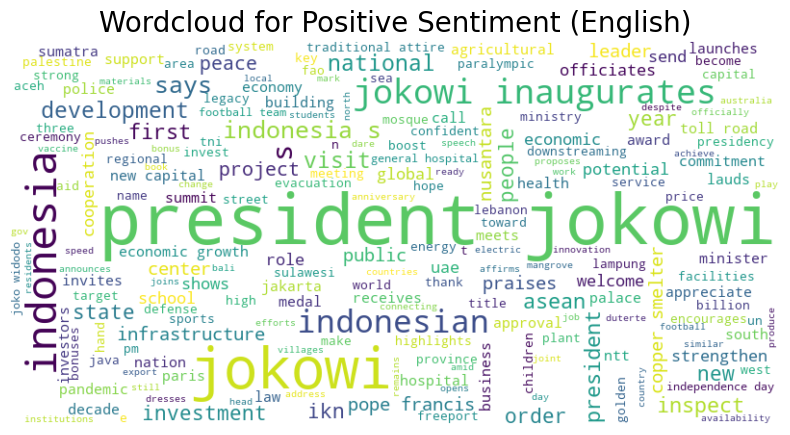

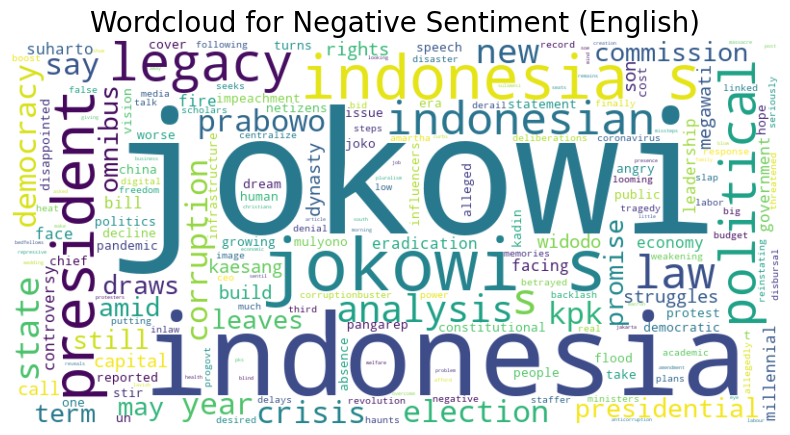

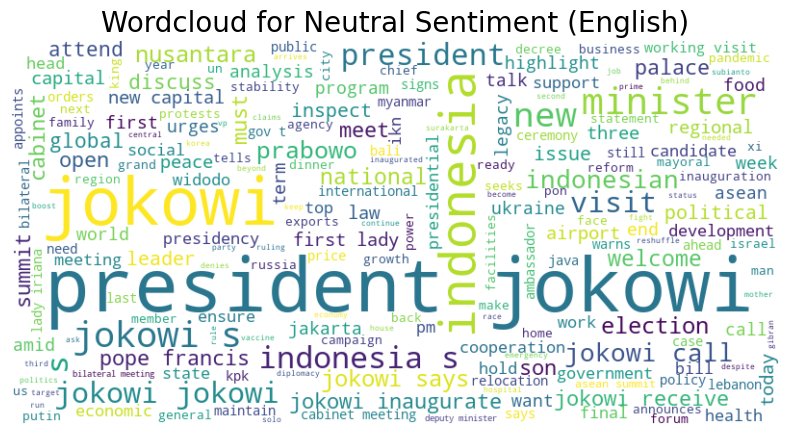

In [14]:
# Fungsi untuk menampilkan wordcloud

def plot_wordcloud(text, title):

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))

    plt.imshow(wordcloud, interpolation="bilinear")

    plt.title(title, fontsize=20)

    plt.axis('off')

    plt.show()



# Filter data hanya untuk bahasa Inggris

english_data = data[data['Detected Language'] == 'en']



# Menggabungkan semua teks berdasarkan sentimen untuk bahasa Inggris

positive_text_en = ' '.join(english_data[english_data['sentiment'] == 'positive']['stopword'])

negative_text_en = ' '.join(english_data[english_data['sentiment'] == 'negative']['stopword'])

neutral_text_en = ' '.join(english_data[english_data['sentiment'] == 'neutral']['stopword'])



# Membuat wordcloud untuk setiap kategori sentimen dalam bahasa Inggris

plot_wordcloud(positive_text_en, 'Wordcloud for Positive Sentiment (English)')

plot_wordcloud(negative_text_en, 'Wordcloud for Negative Sentiment (English)')

plot_wordcloud(neutral_text_en, 'Wordcloud for Neutral Sentiment (English)')


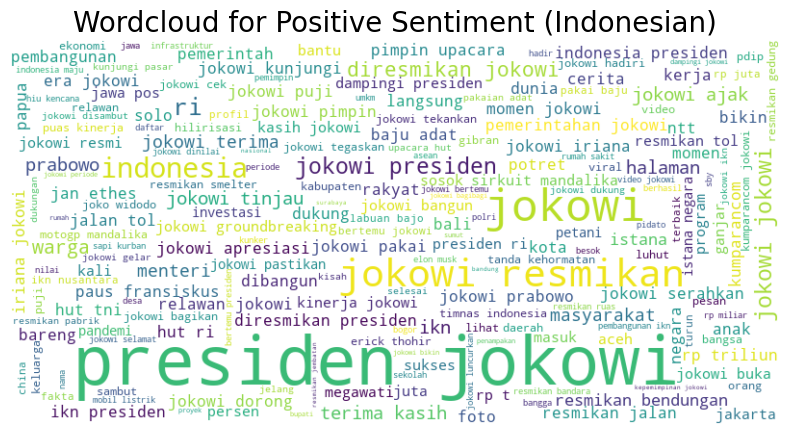

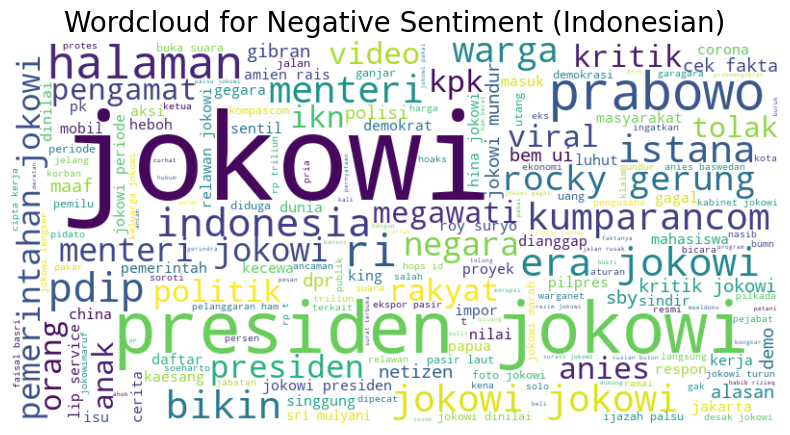

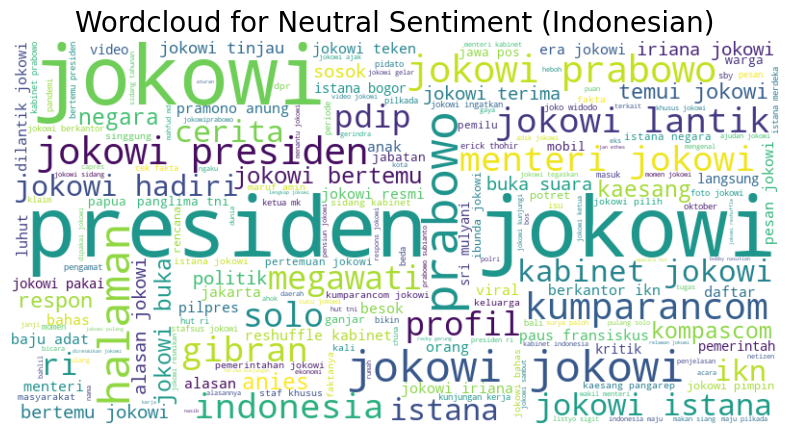

In [16]:
# Fungsi untuk menampilkan wordcloud

def plot_wordcloud(text, title):

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))

    plt.imshow(wordcloud, interpolation="bilinear")

    plt.title(title, fontsize=20)

    plt.axis('off')

    plt.show()



# Filter data hanya untuk bahasa Inggris

indonesian_data = data[data['Detected Language'] == 'id']



# Menggabungkan semua teks berdasarkan sentimen untuk bahasa Inggris

positive_text_en = ' '.join(indonesian_data[indonesian_data['sentiment'] == 'positive']['stopword'])

negative_text_en = ' '.join(indonesian_data[indonesian_data['sentiment'] == 'negative']['stopword'])

neutral_text_en = ' '.join(indonesian_data[indonesian_data['sentiment'] == 'neutral']['stopword'])



# Membuat wordcloud untuk setiap kategori sentimen dalam bahasa Inggris

plot_wordcloud(positive_text_en, 'Wordcloud for Positive Sentiment (Indonesian)')

plot_wordcloud(negative_text_en, 'Wordcloud for Negative Sentiment (Indonesian)')

plot_wordcloud(neutral_text_en, 'Wordcloud for Neutral Sentiment (Indonesian)')


In [17]:
# Fungsi untuk mendapatkan unigrams yang paling sering muncul

def get_top_n_words(text_series, n):

    words = ' '.join(text_series).split()

    top_n = Counter(words).most_common(n)

    return top_n



# Mengambil top 20 unigrams untuk masing-masing sentimen

pos_unigrams = get_top_n_words(data[data['sentiment'] == 'positive']['stopword'], 20)

neg_unigrams = get_top_n_words(data[data['sentiment'] == 'negative']['stopword'], 20)

neutral_unigrams = get_top_n_words(data[data['sentiment'] == 'neutral']['stopword'], 20)



# Dataframe untuk unigrams Positif

df1 = pd.DataFrame(pos_unigrams, columns=['Text', 'count'])



# Dataframe untuk unigrams Negatif

df2 = pd.DataFrame(neg_unigrams, columns=['Text', 'count'])



# Dataframe untuk unigrams Netral

df3 = pd.DataFrame(neutral_unigrams, columns=['Text', 'count'])



# Plot unigrams untuk sentimen Positif

fig1 = px.bar(df1, x='count', y='Text', orientation='h',

              title='Top 20 Unigrams in Positive Text', 

              labels={'count': 'Count', 'Text': 'Unigram'}, color='Text')

fig1.show()



# Plot unigrams untuk sentimen Negatif

fig2 = px.bar(df2, x='count', y='Text', orientation='h',

              title='Top 20 Unigrams in Negative Text', 

              labels={'count': 'Count', 'Text': 'Unigram'}, color='Text')

fig2.show()



# Plot unigrams untuk sentimen Netral

fig3 = px.bar(df3, x='count', y='Text', orientation='h',

              title='Top 20 Unigrams in Neutral Text', 

              labels={'count': 'Count', 'Text': 'Unigram'}, color='Text')

fig3.show()


In [18]:
# Fungsi untuk mendapatkan top n bigram

def get_top_n_gram(corpus, ngram_range, n=None):

    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)

    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    return words_freq[:n]



# Mengambil top 20 bigram untuk masing-masing sentimen

pos_bigrams = get_top_n_gram(data[data['sentiment'] == 'positive']['stopword'], (2,2), 20)

neg_bigrams = get_top_n_gram(data[data['sentiment'] == 'negative']['stopword'], (2,2), 20)

neutral_bigrams = get_top_n_gram(data[data['sentiment'] == 'neutral']['stopword'], (2,2), 20)



# Dataframe untuk bigram Positif

df1 = pd.DataFrame(pos_bigrams, columns=['Text', 'count'])



# Dataframe untuk bigram Negatif

df2 = pd.DataFrame(neg_bigrams, columns=['Text', 'count'])



# Dataframe untuk bigram Netral

df3 = pd.DataFrame(neutral_bigrams, columns=['Text', 'count'])



# Plot bigrams untuk sentimen Positif

fig1 = px.bar(df1, x='count', y='Text', orientation='h',

              title='Top 20 Bigrams in Positive Text',

              labels={'count': 'Count', 'Text': 'Bigram'}, color='Text')

fig1.show()



# Plot bigrams untuk sentimen Negatif

fig2 = px.bar(df2, x='count', y='Text', orientation='h',

              title='Top 20 Bigrams in Negative Text',

              labels={'count': 'Count', 'Text': 'Bigram'}, color='Text')

fig2.show()



# Plot bigrams untuk sentimen Netral

fig3 = px.bar(df3, x='count', y='Text', orientation='h',

              title='Top 20 Bigrams in Neutral Text',

              labels={'count': 'Count', 'Text': 'Bigram'}, color='Text')

fig3.show()


In [19]:
# Mengambil top 20 trigrams untuk masing-masing sentimen

pos_trigrams = get_top_n_gram(data[data['sentiment'] == 'positive']['stopword'], (3,3), 20)

neg_trigrams = get_top_n_gram(data[data['sentiment'] == 'negative']['stopword'], (3,3), 20)

neutral_trigrams = get_top_n_gram(data[data['sentiment'] == 'neutral']['stopword'], (3,3), 20)



# Dataframe untuk trigram Positif

df1 = pd.DataFrame(pos_trigrams, columns=['Text', 'count'])



# Dataframe untuk trigram Negatif

df2 = pd.DataFrame(neg_trigrams, columns=['Text', 'count'])



# Dataframe untuk trigram Netral

df3 = pd.DataFrame(neutral_trigrams, columns=['Text', 'count'])



# Plot trigrams untuk sentimen Positif

fig1 = px.bar(df1, x='count', y='Text', orientation='h',

              title='Top 20 Trigrams in Positive Text',

              labels={'count': 'Count', 'Text': 'Trigram'}, color='Text')

fig1.show()



# Plot trigrams untuk sentimen Negatif

fig2 = px.bar(df2, x='count', y='Text', orientation='h',

              title='Top 20 Trigrams in Negative Text',

              labels={'count': 'Count', 'Text': 'Trigram'}, color='Text')

fig2.show()



# Plot trigrams untuk sentimen Netral

fig3 = px.bar(df3, x='count', y='Text', orientation='h',

              title='Top 20 Trigrams in Neutral Text',

              labels={'count': 'Count', 'Text': 'Trigram'}, color='Text')

fig3.show()